In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cobra
from cobra.io import read_sbml_model
from load_json import load_json_model

 Read models

In [ ]:
model = read_sbml_model('models/Pan_putida2-Final.xml')
old_model = load_json_model('models/iJN1463.json')
model

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


Name,Pan_putida2
Memory address,0x07f30da2dddc0
Number of metabolites,2525
Number of reactions,3301
Number of groups,0
Objective expression,1.0*BiomassKT2440_WT3 - 1.0*BiomassKT2440_WT3_reverse_2cf2b
Compartments,"cytosol, extracellular space, periplasm, h, r, m, w"


Look for subsystems across previous models and modelseed annotations

In [ ]:
modelseed_subsystems = pd.read_table('annotations/ModelSEED_Subsystems.tsv')
modelseed_rxns = pd.read_table('annotations/reactions.tsv')
subsystems = modelseed_rxns.rename(columns={'id':'Reaction'}).merge(modelseed_subsystems,on='Reaction')
subsystems

,Reaction,abbreviation,name,code,stoichiometry,is_transport,equation,definition,reversibility,direction,...,compound_ids,status,is_obsolete,linked_reaction,notes,source,Class,Sub-class,Name,Role
0,rxn00001,R00004,diphosphate phosphohydrolase,(1) cpd00001[0] + (1) cpd00012[0] <=> (2) cpd0...,"-1:cpd00001:0:0:""H2O"";-1:cpd00012:0:0:""PPi"";2:...",0,(1) cpd00001[0] + (1) cpd00012[0] <=> (2) cpd0...,(1) H2O[0] + (1) PPi[0] <=> (2) Phosphate[0] +...,>,=,...,cpd00001;cpd00009;cpd00012;cpd00067,OK,0,rxn27946;rxn27947;rxn27948;rxn32487;rxn38157;r...,GCC|HB|EQC|EQU,Primary Database,Experimental Subsystems,-,271-Bsub,Manganese-dependent inorganic pyrophosphatase ...
1,rxn00001,R00004,diphosphate phosphohydrolase,(1) cpd00001[0] + (1) cpd00012[0] <=> (2) cpd0...,"-1:cpd00001:0:0:""H2O"";-1:cpd00012:0:0:""PPi"";2:...",0,(1) cpd00001[0] + (1) cpd00012[0] <=> (2) cpd0...,(1) H2O[0] + (1) PPi[0] <=> (2) Phosphate[0] +...,>,=,...,cpd00001;cpd00009;cpd00012;cpd00067,OK,0,rxn27946;rxn27947;rxn27948;rxn32487;rxn38157;r...,GCC|HB|EQC|EQU,Primary Database,Phosphorus Metabolism,-,Phosphate_metabolism,Inorganic pyrophosphatase (EC 3.6.1.1)
2,rxn00001,R00004,diphosphate phosphohydrolase,(1) cpd00001[0] + (1) cpd00012[0] <=> (2) cpd0...,"-1:cpd00001:0:0:""H2O"";-1:cpd00012:0:0:""PPi"";2:...",0,(1) cpd00001[0] + (1) cpd00012[0] <=> (2) cpd0...,(1) H2O[0] + (1) PPi[0] <=> (2) Phosphate[0] +...,>,=,...,cpd00001;cpd00009;cpd00012;cpd00067,OK,0,rxn27946;rxn27947;rxn27948;rxn32487;rxn38157;r...,GCC|HB|EQC|EQU,Primary Database,Phosphorus Metabolism,-,Phosphate_metabolism,Manganese-dependent inorganic pyrophosphatase ...
3,rxn00001,R00004,diphosphate phosphohydrolase,(1) cpd00001[0] + (1) cpd00012[0] <=> (2) cpd0...,"-1:cpd00001:0:0:""H2O"";-1:cpd00012:0:0:""PPi"";2:...",0,(1) cpd00001[0] + (1) cpd00012[0] <=> (2) cpd0...,(1) H2O[0] + (1) PPi[0] <=> (2) Phosphate[0] +...,>,=,...,cpd00001;cpd00009;cpd00012;cpd00067,OK,0,rxn27946;rxn27947;rxn27948;rxn32487;rxn38157;r...,GCC|HB|EQC|EQU,Primary Database,Regulation and Cell signaling,-,HPr_catabolite_repression_system,Inorganic pyrophospatase PpaX
4,rxn00002,R00005,urea-1-carboxylate amidohydrolase,(1) cpd00001[0] + (1) cpd00742[0] <=> (2) cpd0...,"-1:cpd00001:0:0:""H2O"";-3:cpd00067:0:0:""H+"";-1:...",0,(1) cpd00001[0] + (3) cpd00067[0] + (1) cpd007...,(1) H2O[0] + (3) H+[0] + (1) Allophanate[0] =>...,>,>,...,cpd00001;cpd00011;cpd00013;cpd00067;cpd00742,OK,0,rxn30346;rxn35525,GCC|EQC|EQU,Primary Database,Experimental Subsystems,Pyrimidines,Novel_non-oxidative_pathway_of_Uracil_catabolism,Allophanate hydrolase (EC 3.5.1.54)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9815,rxn13784,rxn13784,RNA transcription,<=> (1) cpd17043[0],"1:cpd17043:0:0:""RNA transcription""",0,<=> (1) cpd17043[0],<=> (1) RNA transcription[0],?,=,...,cpd17043,CPDFORMERROR,0,NaN,GCP|EQP,Orphan,RNA Metabolism,Transcription,Transcription_factors_cyanobacterial_RpoD-like...,RNA polymerase sigma factor RpoD
9816,rxn13784,rxn13784,RNA transcription,<=> (1) cpd17043[0],"1:cpd17043:0:0:""RNA transcription""",0,<=> (1) cpd17043[0],<=> (1) RNA transcription[0],?,=,...,cpd17043,CPDFORMERROR,0,NaN,GCP|EQP,Orphan,RNA Metabolism,Transcription,"Transcription_initiation,_bacterial_sigma_factors",RNA polymerase sigma factor RpoD
9817,rxn13784,rxn13784,RNA transcription,<=> (1) cpd17043[0],"1:cpd17043:0:0:""RNA transcription""",0,<=> (1) cpd17043[0],<=> (1) RNA transcription[0],?,=,...,cpd17043,CPDFORMERROR,0,NaN,GCP|EQP,Orphan,Stress Response,Oxidative stress,Glutaredoxins,tRNA (cytosine34-2'-O-)-methyltransferase (EC ...
9818,rxn13784,rxn13784,RNA transcription,<=> (1) cpd17043[0],"1:cpd17043:0:0:""RNA transcription""",0,<=> (1) cpd17043[0],<=> (1) RNA transcription[0],?,=,...,cpd17043,CPDFORMERROR,0,NaN,GCP|EQP,Orphan,Virulence,Iron Scavenging Mechanisms,"Heme,_hemin_uptake_and_utilization_systems_in_...",Two-component response regulator SA14-24


In [4]:
subs = list(set([old_model.reactions.get_by_id(j).subsystem for j in [w.id for w in model.reactions if w.id in [k.id for k in old_model.reactions]]]))

In [5]:
'''
Simplify older model subsystem annotations 
'''

metabolic_categories = {
    "Central Carbon Metabolism": [
        "S_Glycolysis",
        "S_TCA_Cycle", 
        "S_Gluconeogenesis",
        "S_Pentose_Phosphate_Pathway",
        "S_Pyruvate_Metabolism",
        "S_Oxidative_Phosphorylation",
        "S_Glyoxylate_and_dicarboxylate_metabolism"
    ],
    
    "Alternative Carbon Metabolism": [
        "S_Alternate_Carbon__Ribose_Metabolism",
        "S_Alternate_Carbon__Fructose_Metabolism", 
        "S_Alternate_Carbon__Propanoate_Metabolism",
        "S_Alternate_Carbon__Butanediol_Metabolism",
        "S_Alternate_Carbon__Levulinate_Metabolism",
        "S_Alternate_Carbon__Ascorbate_and_Aldarate_Metabolism",
        "S_Alternate_Carbon",
        "S_Starch_and_Sucrose_Metabolism",
        "S_Butanoate_Metabolism",
    ],
    
    "Amino Acid Metabolism": [
        "S_Lysine_Metabolism",
        "S_Arginine_and_Proline_Metabolism",
        "S_Phenylalanine_Tyrosine_Tryptophan_Biosynthesis",
        "S_Alanine_and_Aspartate_Metabolism",
        "S_Glycine__Serine_and_threonine_metabolism", 
        "S_Valine__Leucine__and_Isoleucine_Metabolism",
        "S_Glutamate_Metabolism",
        "S_Methionine_Metabolism",
        "S_Histidine_Metabolism",
        "S_Cysteine_Metabolism",
        "S_Urea_cycleamino_group_metabolism"
    ],
    
    "Nucleotide Metabolism": [
        "S_Nucleotide_Salvage_Pathway",
        "S_Pyrimidine_Metabolism",
        "S_Purine_Metabolism", 
        "S_Alternate_Carbon_and_Nitrogen_source__Nucleotide_Metabolism"
    ],
    
    "Fatty Acid and Lipid Metabolism": [
        "S_Fatty_Acid__Biosynthesis",
        "S_Fatty_Acid_Metabolism",
        "S_Glycerophospholipid_Metabolism",
        "Aliphatic open-chain ketones metabolism"
    ],
    
    "Cell Envelope and Wall Biosynthesis": [
        "S_Cell_Envelope_Biosynthesis",
        "S_Cell_Envelope_Biosynthesis__Cellulose_Metabolism",
        "S_Cell_Envelope_Biosynthesis__Peptidoglycan_Biosynthesis",
        "S_Cell_Envelope_Biosynthesis__Lipid_A_Biosynthesis",
        "S_Cell_Envelope_Biosynthesis__LPS_Biosynthesis",
        "S_Cell_Envelope_Biosynthesis__Biosynthesis_of_L_glycero_D_manno_heptose__Hep_",
        "S_Cell_Envelope_Biosynthesis__O_antigen_Biosynthesis",
        "Murein Recycling"
    ],
    
    "Cofactor and Vitamin Biosynthesis": [
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Ubiquinone_biosynthesis",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Nicotinamide_Biosynthesis",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Vitamin_B6_Metabolism",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Terpenoid_backbone_biosynthesis",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__FeS_clusters_metabolism",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Molybdopterin_Biosynthesis",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Biotin_Biosynthesis",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis___Pyrroloquinoline_quinone_biosynthesis",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Pantothenate_and_CoA_Biosynthesis",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Thiamine_Metabolism",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Porphyrin_and_Chlorophyll_Metabolism",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Riboflavin_Metabolism",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Queuosine_biosynthesis",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__Folate_Biosynthesis",
        "S_Cofactor_and_Prosthetic_Group_Biosynthesis__One_Carbon_pool_by_folate"
    ],
    
    "Transport Systems": [
        "S_Transport__Inner_Membrane",
        "S_Transport__ABC_system",
        "S_Transport__Outer_Membrane",
        "S_Transport__solvent_extrusion",
        "Extracellular exchange"
    ],
    
    "Energy Metabolism": [
        "S_Oxidative_Phosphorylation",
    ],
    
    "Aromatic Compound Degradation": [
        "S_Aromatic_Compounds_Degradation__Nicotinic_acid_pathway",
        "S_Aromatic_Compounds_Degradation__Toluene_Pathway",
        "S_Aromatic_Compounds_Degradation__Phenylacetyl_CoA_Catabolom",
        "S_Aromatic_Compounds_Degradation__Homogentisate_pathway",
        "S_Aromatic_Compounds_Degradation__B_Ketoadipate_pathway",
        "S_Aromatic_Compounds_Degradation__Gallic_acid_Metabolism"
    ],
    
    "Nitrogen Metabolism": [
        "S_Nitrogen_Metabolism",
        "S_Alternate_Carbon_and_Nitrogen_source__Ectoine_Metabolism",
        "S_Alternate_Carbon_and_Nitrogen_source__D_Amino_acids_Metabolism", 
        "S_Alternate_Carbon_and_Nitrogen_source__Hydroxy_proline_metabolism",
        "S_Alternate_Carbon_and_Nitrogen_source__Dipeptide_Metabolism",
        "S_Alternate_Carbon_and_Nitrogen_source__Amines_and_Polyamines_Metabolism"
    ],
    
    "Metal and Inorganic Metabolism": [
        "S_Heavy_Metal_Tolerance",
        "S_Iron_uptake_and_metabolism",
        "S_Sulfur_Metabolism",
        "S_Phosphonate_and_phosphinate_metabolism",
        "S_Inorganic_polyphosphates_metabolism"
    ],
    
    "Cellular Processes and Storage": [
        "S_PHAs_Metabolism",
        "S_Alginate_biosynthesis", 
        "S_tRNA_Charging",
        "S_Formaldehyde_Metabolism"
    ],
    
    "Stress Response and Environmental Adaptation": [
        "S_Xenobiotic_tolerance",
        "S_Plant_growth_promoting"
    ],
    
    "Core Cellular Functions": [
        "Biomass and maintenance functions",
        "Intracellular demand",
    ]
}


pathway_to_category = {}
for category, pathways in metabolic_categories.items():
    for pathway in pathways:
        pathway_to_category[pathway] = category

        

In [6]:
pathway_to_category

for rxn in old_model.reactions:
    if rxn.subsystem in list(pathway_to_category.keys()):
        rxn.subsystem = pathway_to_category[rxn.subsystem]
    elif(rxn.subsystem=='Unassigned'):
        rxn.subsystem = 'Uassigned'
    else:
        rxn.subsystem = 'Unassigned'

In [7]:
for rxn in model.reactions:
    if(rxn.id in [w.id for w in old_model.reactions]):
        rxn.subsystem = old_model.reactions.get_by_id(rxn.id).subsystem
    elif('transport' in rxn.name.lower() or 'symport' in rxn.name.lower() or 'exchange' in rxn.name.lower()):
        rxn.subsystem = 'Transport Systems'
    else:
        rxn.subsystem = 'Unassigned'


        

In [8]:
rxn_by_subsystem = pd.DataFrame()
rxn_by_subsystem['ID'] = [rxn.id for rxn in model.reactions]
rxn_by_subsystem['Reaction'] = [rxn.reaction for rxn in model.reactions]
rxn_by_subsystem['Name'] = [rxn.name for rxn in model.reactions]
rxn_by_subsystem['Subsystem'] = [rxn.subsystem for rxn in model.reactions]


In [ ]:
rxn_by_subsystem[rxn_by_subsystem['Subsystem']=='Unassigned'].to_csv('annotations/unassigned_reactions.csv', index=False)

In [ ]:
gpt_subsystems = pd.read_csv('annotations/annotated_reactions_alt_dict.csv')
gpt_subsystems['Assigned_Top_Category'].value_counts()

Unclassified                           78
Amino Acid Metabolism                  73
Cofactor and Vitamin Biosynthesis      41
Central Carbon Metabolism              34
Transport Systems                      31
Alternative Carbon Metabolism          27
Nitrogen Metabolism                    17
Fatty Acid and Lipid Metabolism        15
Metal and Inorganic Metabolism         14
Cellular Processes and Storage         12
Nucleotide Metabolism                  11
Aromatic Compound Degradation           7
Cell Envelope and Wall Biosynthesis     2
Name: Assigned_Top_Category, dtype: int64

In [11]:
gpt_subsystems[gpt_subsystems['Assigned_Top_Category']=='Unclassified'].to_csv('gpt_unclassified_reactions.csv')

In [ ]:
claude_subsystems_1 = pd.read_csv('annotations/annotated_reactions_claude.txt')
claude_subsystems_2 = pd.read_csv('annotations/annotated_reactions_claude_2.txt')

claude_subsystems = pd.concat([claude_subsystems_1,claude_subsystems_2])

claude_subsystems.loc[
    claude_subsystems['Assigned_Subsystem'] == 'S_Oxidative_Phosphorylation',
    'Assigned_Top_Category'
] = 'Energy Metabolism'

In [34]:
gpts = gpt_subsystems[gpt_subsystems['Assigned_Top_Category']!='Unclassified'][['ID','Assigned_Top_Category']]
new_subsystems = pd.concat([claude_subsystems[['ID','Assigned_Top_Category']], gpts], ignore_index=True)


In [35]:
# Build a dictionary: {reaction_id: subsystem}
id_to_subsystem = dict(zip(new_subsystems['ID'], new_subsystems['Assigned_Top_Category']))

# Assign subsystems in one pass
for rxn in model.reactions:
    if rxn.id in id_to_subsystem:
        rxn.subsystem = id_to_subsystem[rxn.id]

In [39]:
model_subsystems_desc = pd.Series([w.subsystem for w in model.reactions]).value_counts()
old_model_subsystems_desc = pd.Series([w.subsystem for w in old_model.reactions]).value_counts()

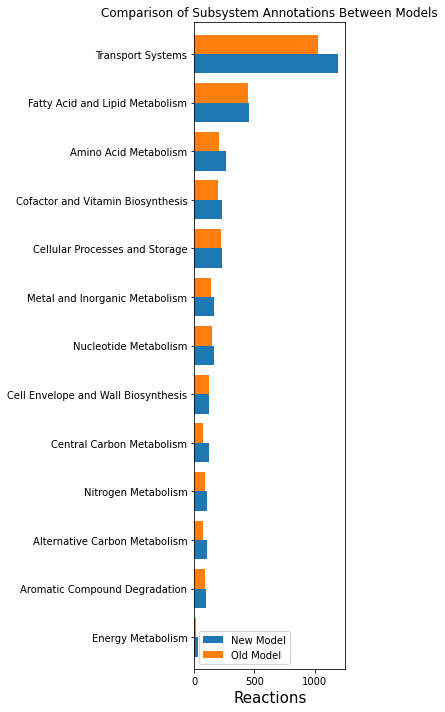

In [61]:
# Combine into a single DataFrame, aligning by subsystem name
df_compare = pd.concat(
    [model_subsystems_desc.rename("New Model"),
     old_model_subsystems_desc.rename("Old Model")],
    axis=1
).fillna(0)  # fill missing subsystems with 0

# Sort by New Model counts (optional)
df_compare = df_compare.sort_values("New Model", ascending=True)
df_compare = df_compare.drop(index=['Uassigned','Core Cellular Functions','Stress Response and Environmental Adaptation','Unassigned'])
# Plot grouped bar chart
ax = df_compare.plot(kind="barh", figsize=(5, 10), width=0.8)


ax.set_xlabel("Reactions",fontsize=15)
ax.set_title("Comparison of Subsystem Annotations Between Models")
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [62]:
# add subsystems to strain specific models


In [70]:
ignore_models = ['iJN746.xml','iJN1463.json','Pan_putida2-Final.xml']

import os

files = os.listdir('models') 


ref_rxn_ids = [w.id for w in model.reactions]
ref_rxn_set = set(ref_rxn_ids)

metabolic_pangenome_rxns = pd.DataFrame(index=ref_rxn_ids)

for file in os.listdir("models"):
    if file in ignore_models or not file.endswith(".xml"):
        continue

    col = file.split("-Final.xml")[0]
    if col not in metabolic_pangenome_rxns.columns:
        metabolic_pangenome_rxns[col] = 0

    model_to_curate = read_sbml_model(os.path.join("models", file))

    for rxn in model_to_curate.reactions:
        if rxn.id in ref_rxn_set:
            rxn.subsystem = model.reactions.get_by_id(rxn.id).subsystem
            metabolic_pangenome_rxns.loc[rxn.id, col] += 1
        else:
            rxn.subsystem = "Unassigned"

# ensure integers
metabolic_pangenome_rxns = metabolic_pangenome_rxns.astype("int16")
               
            

                


In [71]:
metabolic_pangenome_rxns

,31800,31753,23973,KT2440,17428,598,12842,795,17453,25571,...,21025,15070,49688,4359,43142,8209,17485,23974,11172,17522
13DAMPPabcpp,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
13DAMPPtex,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
15DAPabcpp,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1P2CBXLCYCL,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1P2CBXLR,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OCRESt2pp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
TOLOMONOOX1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
TOLOMONOOX2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
TOLOMONOOX3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [103]:
### Pie chart of core, accessory and rare reactions

df = metabolic_pangenome_rxns.copy()

df = df.apply(pd.to_numeric, errors="coerce").fillna(0).astype(int)


subsys_map = {rxn.id: (rxn.subsystem if rxn.subsystem else "Unassigned") for rxn in model.reactions}
subsys = pd.Series(subsys_map, name="Subsystem")

subsys = subsys.reindex(df.index).fillna("Unassigned")


freq = df.mean(axis=1)  # fraction of columns with a 1
def classify(p):
    if p >= 0.98:
        return "Core (≥98%)"
    elif p < 0.1:
        return "Rare (<10%)"
    else:
        return "Accessory (10–98%)"

cls = freq.map(classify)
cls.name = "Class"

cls = pd.DataFrame(cls)
cls['In Old Model'] = 0

for rxn in cls.index:
    if(rxn in [w.id for w in old_model.reactions]):
        cls.loc[rxn,'In Old Model'] = 1
    else:
        cls.loc[rxn,'In Old Model'] = 0

In [104]:
cls

,Class,In Old Model
13DAMPPabcpp,Core (≥98%),1
13DAMPPtex,Core (≥98%),1
15DAPabcpp,Core (≥98%),1
1P2CBXLCYCL,Core (≥98%),1
1P2CBXLR,Accessory (10–98%),1
...,...,...
OCRESt2pp,Rare (<10%),0
TOLOMONOOX1,Rare (<10%),0
TOLOMONOOX2,Rare (<10%),0
TOLOMONOOX3,Rare (<10%),0


In [105]:
cls["Class"] = cls["Class"].replace({
    "Core (≥98%)": "Core",
    "Accessory (10–98%)": "Accessory",
    "Rare (<10%)": "Rare"
})

# Create a status column: Old model vs New additions
cls["Status"] = np.where(cls["In Old Model"].astype(int) == 1, "Old model", "New additions")

# Helpful aggregates
tot_by_class = cls.groupby("Class").size().rename("total")
old_by_class = cls[cls["In Old Model"].astype(int) == 1].groupby("Class").size().rename("old")
new_by_class = cls[cls["In Old Model"].astype(int) == 0].groupby("Class").size().rename("new")

summary = (
    pd.concat([tot_by_class, old_by_class, new_by_class], axis=1)
    .fillna(0)
    .astype(int)
    .assign(prop_new=lambda d: d["new"] / d["total"].where(d["total"] != 0, np.nan))
)
summary

,total,old,new,prop_new
Class,,,,
Accessory,862,396,466,0.540603
Core,2406,2406,0,0.000000
Rare,33,0,33,1.000000


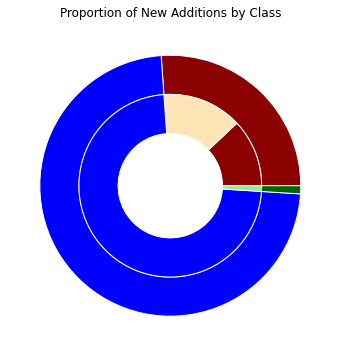

In [129]:
# Colors (dark for total, light for new additions)
colors_dark = {
    "Core": "blue",
    "Accessory": "darkred",
    "Rare": "darkgreen"
}
colors_light = {
    "Core": "blue",
    "Accessory": "moccasin",
    "Rare": "lightgreen"
}

totals = summary["total"].tolist()
new_adds = summary["new"].tolist()
old_parts = (summary["total"] - summary["new"]).tolist()

# Outer ring (total)
outer_sizes = totals
outer_colors = [colors_dark[k] for k in summary.index.tolist()]

# Inner ring (old vs new within each category)
inner_sizes = []
inner_colors = []
for k in summary.index.tolist():
    if old_parts[list(summary.index.tolist()).index(k)] > 0:
        inner_sizes.append(old_parts[list(summary.index.tolist()).index(k)])
        inner_colors.append(colors_dark[k])
    if new_adds[list(summary.index.tolist()).index(k)] > 0:
        inner_sizes.append(new_adds[list(summary.index.tolist()).index(k)])
        inner_colors.append(colors_light[k])

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(outer_sizes, colors=outer_colors, radius=1, wedgeprops=dict(width=0.3, edgecolor="white"))
ax.pie(inner_sizes, colors=inner_colors, radius=0.7, wedgeprops=dict(width=0.3, edgecolor="white"))

# Add center circle for donut
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig.gca().add_artist(centre_circle)

ax.set(aspect="equal")
plt.title("Proportion of New Additions by Class")
plt.show()